<a href="https://colab.research.google.com/github/AmirDice/anomalydeteccdn/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from google.colab import files
import io

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['dst.csv']))
data.head()

Saving dst.csv to dst.csv


,timestamp,Status code,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,...,geo-location,Live channel,devicemodel,devicebrand,Host,method,assetnumber,hit,cachename,uid
0,14/05/2088 23:07,206,video/mp4,HTTP/1.1,13392.936510,0.000150,0.000689,31536000.0,0.0,153806.0,...,773.0,NaN,NaN,NaN,4.0,GET,253.0,hit,0.0,NaN
1,16/05/2088 02:43,502,text/html,HTTP/1.1,2.634921,0.020632,0.020684,NaN,1.0,165279.0,...,1.0,1.0,0.0,0.0,1.0,GET,NaN,miss,0.0,7611.0
2,18/05/2088 19:05,403,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/05/2088 20:25,412,text/html,HTTP/1.1,23.888889,0.014797,0.014842,NaN,NaN,207847.0,...,0.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN
4,16/05/2088 04:08,412,text/html,HTTP/1.1,23.888889,0.014794,0.014847,NaN,0.0,234088.0,...,1633.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN


In [3]:
data

,timestamp,Status code,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,...,geo-location,Live channel,devicemodel,devicebrand,Host,method,assetnumber,hit,cachename,uid
0,14/05/2088 23:07,206,video/mp4,HTTP/1.1,13392.936510,0.000150,0.000689,31536000.0,0.0,153806.0,...,773.0,NaN,NaN,NaN,4.0,GET,253.0,hit,0.0,NaN
1,16/05/2088 02:43,502,text/html,HTTP/1.1,2.634921,0.020632,0.020684,NaN,1.0,165279.0,...,1.0,1.0,0.0,0.0,1.0,GET,NaN,miss,0.0,7611.0
2,18/05/2088 19:05,403,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/05/2088 20:25,412,text/html,HTTP/1.1,23.888889,0.014797,0.014842,NaN,NaN,207847.0,...,0.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN
4,16/05/2088 04:08,412,text/html,HTTP/1.1,23.888889,0.014794,0.014847,NaN,0.0,234088.0,...,1633.0,60.0,NaN,NaN,7.0,GET,NaN,miss,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,18/05/2088 19:36,405,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90060,18/05/2088 13:17,412,text/html,HTTP/1.1,23.888889,0.007524,0.007606,NaN,0.0,831914.0,...,5264.0,60.0,NaN,NaN,7.0,GET,NaN,miss,1.0,NaN
90061,16/05/2088 20:20,404,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90062,13/05/2088 09:18,200,application/zip,HTTP/1.1,15.079365,0.000120,0.000179,300.0,0.0,3830.0,...,1.0,NaN,NaN,NaN,0.0,GET,NaN,hit,0.0,NaN


In [4]:
data.isnull().sum()

timestamp               0
Status code             0
contenttype          5141
protocol            31803
contentlength       31803
timefirstbyte       32936
timetoserv          31803
maxage              57173
osfamily            36091
sid                 32936
cachecontrol        31803
uamajor             62018
uafamily            36091
devicefamily        36091
fragment            31803
path                31803
Content Package     83891
geo-location        32966
Live channel        59913
devicemodel         61948
devicebrand         61948
Host                32936
method              31905
assetnumber         83891
hit                 32936
cachename           31803
uid                 74240
dtype: int64

let us drop the columns which consist extremely more null values than others

In [5]:
data = data.drop(['assetnumber','Content Package '], axis=1)

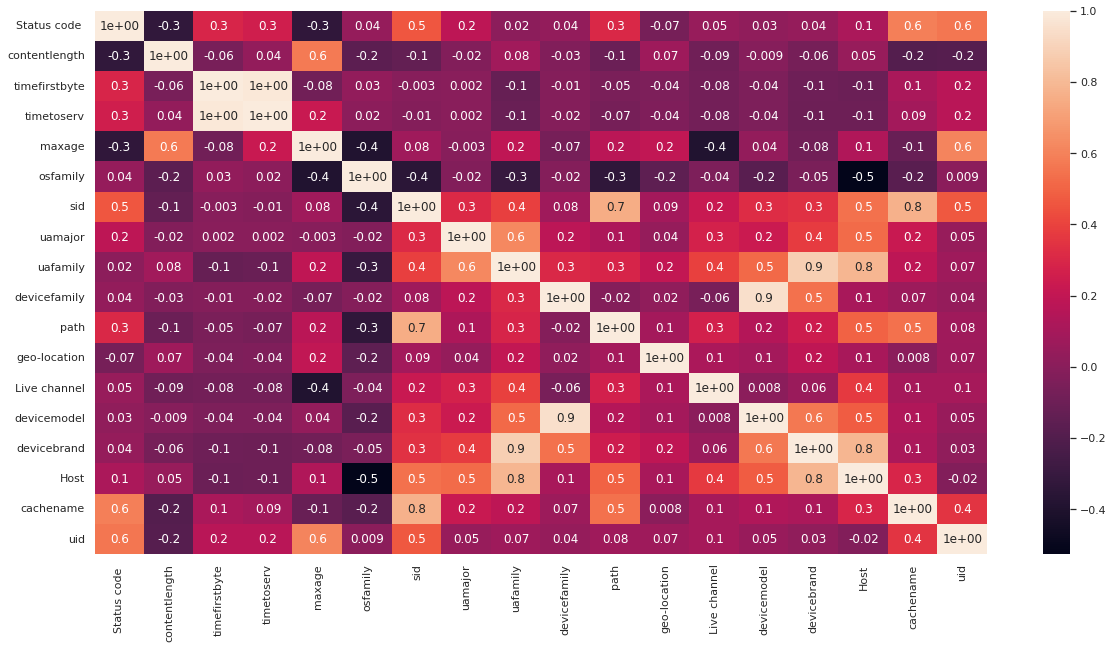

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#figure size
plt.figure(figsize=(20, 10))
#heat map for correlation coefficient
sns.heatmap(data.corr(), annot=True, fmt="0.1")

As you can see, most features are correlated with each other to some degree but some have very low correlations such as timetoserv , osfamily,and timefirstbyte.

In [7]:
data.columns

Index(['timestamp', 'Status code ', 'contenttype', 'protocol', 'contentlength',
       'timefirstbyte', 'timetoserv', 'maxage', 'osfamily', 'sid',
       'cachecontrol', 'uamajor', 'uafamily', 'devicefamily', 'fragment',
       'path', 'geo-location', 'Live channel', 'devicemodel', 'devicebrand',
       'Host', 'method', 'hit', 'cachename', 'uid'],
      dtype='object')

In [8]:
data = data.drop(['uid','cachename','hit','Host','devicemodel','geo-location','fragment','cachecontrol','sid','maxage','contenttype'], axis=1)

In [9]:
data=data.fillna(data.mode().iloc[0])

In [10]:
data.dtypes

timestamp         object
Status code        int64
protocol          object
contentlength    float64
timefirstbyte    float64
timetoserv       float64
osfamily         float64
uamajor          float64
uafamily         float64
devicefamily     float64
path             float64
Live channel     float64
devicebrand      float64
method            object
dtype: object

In [ ]:
data.isnull().sum()

@timestamp       0
Status code      0
protocol         0
contentlength    0
timefirstbyte    0
timetoserv       0
osfamily         0
uamajor          0
uafamily         0
devicefamily     0
path             0
Live channel     0
devicebrand      0
method           0
dtype: int64

In [11]:
data['timestamp'] =  pd.to_datetime(data['timestamp'])

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['protocol']]).toarray())
df2 = data.join(encoder_df)
df2.drop('protocol', axis=1, inplace=True)


In [16]:
df2

,timestamp,Status code,contentlength,timefirstbyte,timetoserv,osfamily,uamajor,uafamily,devicefamily,path,Live channel,devicebrand,method,0,1
0,2088-05-14 23:07:00,206,13392.936510,0.000150,0.000689,0.0,3.0,12.0,0.0,3931298.0,60.0,1.0,GET,0.0,1.0
1,2088-05-16 02:43:00,502,2.634921,0.020632,0.020684,1.0,1.0,2.0,1.0,92.0,1.0,0.0,GET,0.0,1.0
2,2088-05-18 19:05:00,403,0.000000,0.000139,0.000000,0.0,3.0,12.0,0.0,42.0,60.0,1.0,GET,0.0,1.0
3,2088-05-15 20:25:00,412,23.888889,0.014797,0.014842,0.0,3.0,12.0,0.0,21936373.0,60.0,1.0,GET,0.0,1.0
4,2088-05-16 04:08:00,412,23.888889,0.014794,0.014847,0.0,3.0,12.0,0.0,25178360.0,60.0,1.0,GET,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,2088-05-18 19:36:00,405,0.000000,0.000139,0.000000,0.0,3.0,12.0,0.0,42.0,60.0,1.0,GET,0.0,1.0
90060,2088-05-18 13:17:00,412,23.888889,0.007524,0.007606,0.0,3.0,12.0,0.0,70637996.0,60.0,1.0,GET,0.0,1.0
90061,2088-05-16 20:20:00,404,0.000000,0.000139,0.000000,0.0,3.0,12.0,0.0,42.0,60.0,1.0,GET,0.0,1.0
90062,2088-05-13 09:18:00,200,15.079365,0.000120,0.000179,0.0,0.0,0.0,0.0,1.0,60.0,1.0,GET,0.0,1.0


Let us find low variance features:

In [ ]:
(data
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

Status code       9279.603242728685
contentlength    208008983.65056413
maxage            150519285719871.7
sid              127343829326.29764
uamajor           56.17243861411138
uafamily           59.2103190488937
devicefamily     2393.0550828135506
path              660228263874797.1
geo-location     2286316.7223930685
Live channel     1316.9141205385629
devicemodel      3659.4329551460382
devicebrand       7.620594489934448
Host             12.885923973059855
cachename        0.6068612470960238
uid               34764272.99620397
dtype: object

Here ‘cachename’ has an extremely low variance, so this is an ideal candidate for elimination. However, in this particular case, I’d be reluctant to drop it since its values range between 0 and 2, therefore a low variance is expected:

In [ ]:
data['cachename'].describe()


count    58261.000000
mean         0.512779
std          0.779013
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: cachename, dtype: float64

In [18]:
data.dtypes

timestamp        datetime64[ns]
Status code               int64
protocol                 object
contentlength           float64
timefirstbyte           float64
timetoserv              float64
osfamily                float64
uamajor                 float64
uafamily                float64
devicefamily            float64
path                    float64
Live channel            float64
devicebrand             float64
method                   object
dtype: object

In [19]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['method']]).toarray())
df2 = data.join(encoder_df)
df2.drop('method', axis=1, inplace=True)

In [23]:
data.method.unique()

array(['GET', '-'], dtype=object)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

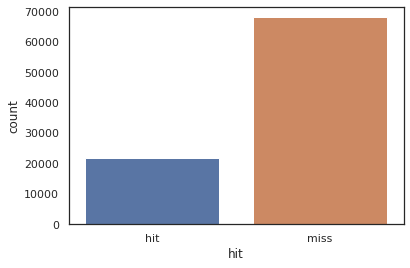

In [ ]:
sns.countplot(x='hit',data = data) 

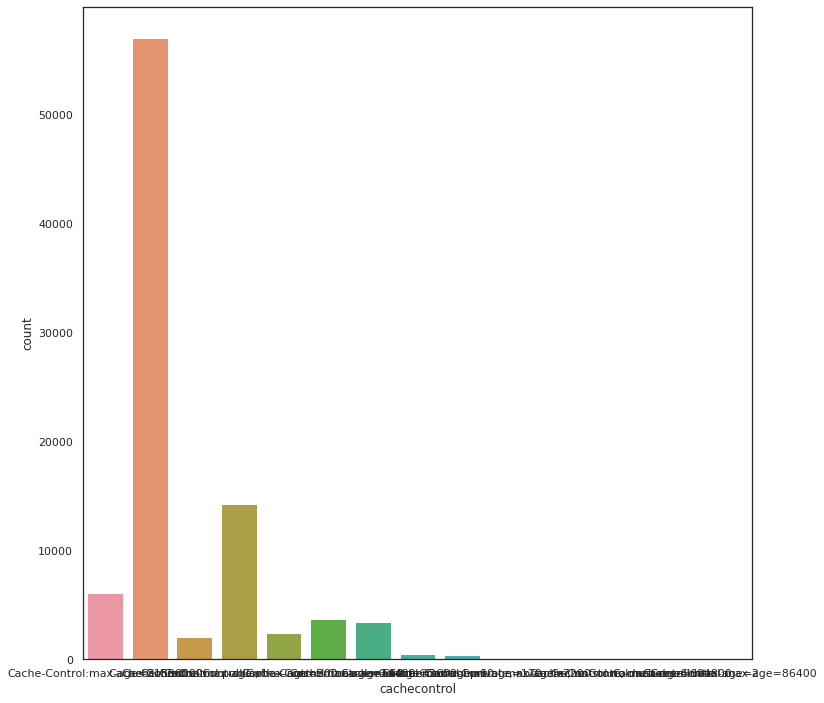

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='fragment',data = data)